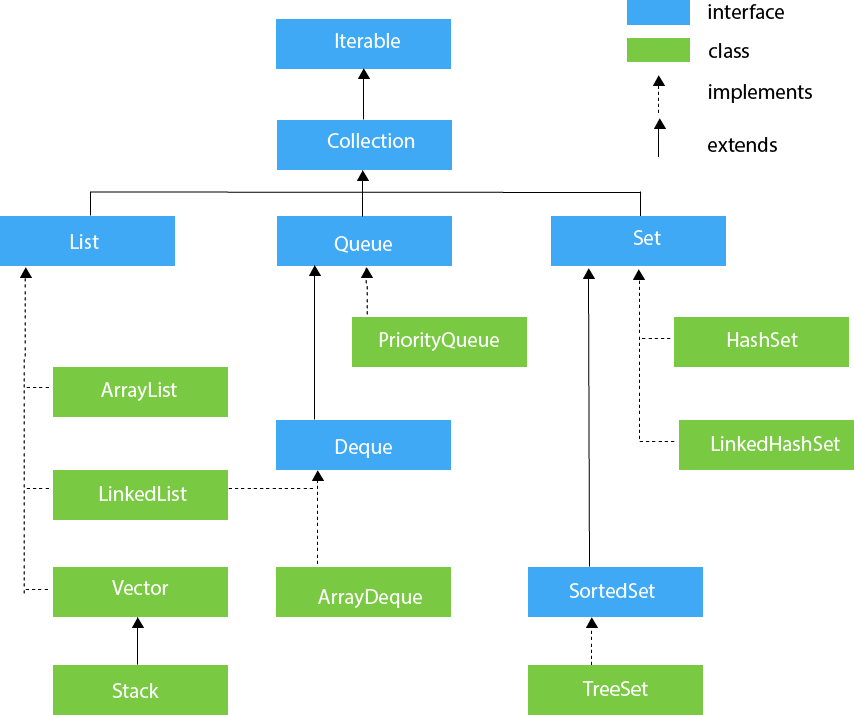



### Collections
    A Collection represents a group of objects known as its elements. The Collection interface is used to pass around collections of objects where maximum generality is desired.
    
    The Collection interface contains methods that perform basic operations, such as int size(), boolean isEmpty(), boolean contains(Object element), boolean add(E element), boolean remove(Object element), and Iterator<E> iterator(). (Depending on the data type that will extend from collection interface, the implementations of these methods can change) 
    
    It also contains methods that operate on entire collections, such as boolean containsAll(Collection<?> c), boolean addAll(Collection<? extends E> c), boolean removeAll(Collection<?> c), boolean retainAll(Collection<?> c), and void clear().
    
    

    In JDK 8 and later, the Collection interface also exposes methods Stream<E> stream() and Stream<E> parallelStream(), for obtaining sequential or parallel streams from the underlying collection. 
    
    The preferred method of iterating over a collection is to obtain a stream and perform aggregate operations on it. Aggregate operations are often used in conjunction with lambda expressions to make programming more expressive, using less lines of code.
    
    stream method will convert the collection to a stream object and everything inside the collection will be object. 
    
    Some stream methods : filter, forEach, map, sum, reduce, collect, max, min, count, findFirst, findAny, etc.

In [12]:
import java.util.stream.Collectors; 

ArrayList<Integer> numbers = new ArrayList<>(); 
numbers.add(5); 
numbers.add(4); 
numbers.add(3); 
numbers.add(2); 
numbers.add(1); 

numbers.stream()
.filter(e -> e*5 >= 15)
.forEach(e -> System.out.println(e)); 

ArrayList<Integer> multipliedNumbers = new ArrayList<>(); 
numbers.stream()
.map(e -> e*5).forEach(multipliedNumbers::add); //::add will call the method on multipliedNumber with parameter e. That's same
//as e -> multipliedNumbers.add(e)

System.out.println(multipliedNumbers); 


String s = numbers.stream()
.map(Object::toString).collect(Collectors.joining(" "));

System.out.println(s); 

5
4
3
[25, 20, 15, 10, 5]
5 4 3 2 1


    Collections also lets to use Iterators. An Iterator is an object that enables you to traverse through a collection and to remove elements from the collection selectively, if desired. You get an Iterator for a collection by calling its iterator method.
    
    Iterators have 3 methods.(hasNext(), next(), remove() ) 
    Note that Iterator.remove is the only safe way to modify a collection during iteration; the behavior is unspecified if the underlying collection is modified in any other way while the iteration is in progress.

In [20]:
List<Integer> c = new ArrayList<>(); 
c.add(1); 
c.add(2); 
c.add(3); 
c.add(4); 
c.add(5); 

for (Iterator<Integer> it = c.iterator(); it.hasNext(); ) {
    int curr = it.next(); 
    if (curr == 3) {
        it.remove(); //remove operation will work properly even when we are iterating. 
    }
}
System.out.println(c); 


[1, 2, 4, 5]


    We can convert a collection to array with toArray() method. The simple form with no arguments creates a new array of Object.

In [33]:
List<Integer> c = new ArrayList<>(Arrays.asList(1, 2, 3, 4, 5)); 
Object[] a = c.toArray(); 
Integer[] b = c.toArray(new Integer[0]); //başka bir türe çevirmek istiyorsak bu şekilde çalıştırabiliriz.  


System.out.println(c); 
System.out.println(Arrays.toString(a)); 
System.out.println(Arrays.toString(b)); 

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


### List
    An ordered collection (sometimes called a sequence). Lists can contain duplicate elements. The user of a List generally has precise control over where in the list each element is inserted and can access elements by their integer index (position).

    List interface includes operations for the followings: 
    
    Positional access — manipulates elements based on their numerical position in the list. This includes methods such as get, set, add, addAll, and remove.
    Search — searches for a specified object in the list and returns its numerical position. Search methods include indexOf and lastIndexOf.
    Iteration — extends Iterator semantics to take advantage of the list's sequential nature. The listIterator methods provide this behavior.
    Range-view — The sublist method performs arbitrary range operations on the list.
    
    
    The Java platform contains two general-purpose List implementations. ArrayList, which is usually the better-performing implementation, and LinkedList which offers better performance under certain circumstances.

    The operations inherited from Collection all do about what you'd expect them to do.

List is an interface but we can define the subclasses of list by first defining them as a List. 

In [3]:
//we can define list types as a list.
List<Integer> l1; 
List<Integer> l2; 

//then we can convert them to the list type that we will use. 
l1 = new ArrayList<>(); 
l2 = new LinkedList<>(); 


### ArrayList

    Arraylist istediğin zaman yeni değer ekleyebildiğin ve istediğin zaman bir değeri silebildiğin, herhangi bir indexdeki elemente kolayca ulaşabildiğin yapıdır. (List interface'inin resizable olarak genişletilmiş halidir) 
    
    Arraylist'ler ilk olarak belli bir büyüklükte oluşturulur(bu büyüklük size olarak değişmez) ve bu büyüklüğe gelene kadarki eklemeler O(1) constant sürede gerçekleşir(tıpkı normal arraylerde arr[i] = value ifadesi gibi eklenir) . Eklenecek yeni değer bu büyüklüğü aşacak duruma gelindiğinde bu sefer yeni daha büyük bir arraylist oluşturulur ve ilk arraylistin değerleri buna eklenir, ekstra yeni gelen değer de eklenir. Yani arraylist'e ekleme(add) işlemi genel olarak O(1) olsa da büyüklüğün değiştiği durumlarda O(n)' dir. Bu duruma amortised constant time denir.(n tane eleman eklendiği durum O(n) sürede gerçekleşecek)
    
    Arraylist methodları : 
    add(E e) : O(1)
    add(int index, E e) : O(n) 
    clear() : O(1)
    contains(Object o) : O(n) 
    indexOf(Object o) : O(n)
    get(int index) : O(1)
    remove(int index), remove(Object o) : O(n)
    set(int index, E element) : O(1) 
    
    ensureCapacity(int minCapacity) -> Increases the capacity of the Arraylist if it's needed. 
    trimToSize() -> trims the capacity of the Arraylist instance to be the list's current size.(deletes every null object at the end)
    
    
    Methods like remove, contains and indexOf checks the equality based on the equals method of the objects. 

    Arraylist'te remove methodu çalıştığı zaman kendinden sonra gelen tüm elemanları 1 birim sola kaydırır. Bunu yapması O(k)-> (k : remove edilen yerden sonraki eleman sayısı) kadar sürer. Yani ilk elemanı remove etmek O(n) sürerken son elemanı remove etmek O(1) kadar sürecektir. 
    

In [1]:
ArrayList<Integer> arr = new ArrayList<>(); 

Random r = new Random(); 

int size = 100000; 
for(int i = 0; i < size; i++){
    arr.add(r.nextInt()); 
}

long start = System.currentTimeMillis(); 

for(int i = 0; i < size; i++){
    arr.remove(arr.size() - 1); 
}

long end = System.currentTimeMillis(); 

System.out.println(end - start); 

for(int i = 0; i < size; i++){
    arr.add(r.nextInt()); 
}

start = System.currentTimeMillis(); 

for(int i = 0; i < size; i++){
    arr.remove(0); 
}

end = System.currentTimeMillis(); 

System.out.println(end - start); 

64
764


    While defining the arraylist, we can't use primitive types.  

In [6]:
//true
ArrayList<Integer> arr = new ArrayList<>(); 

//false
//ArrayList<int> arr = new ArrayList<>(); 

ArrayList tanımlamaları 

    ArrayList(int inital capacity)  -> Arraylist'i ilk tanımladığımızda belli bir capacity belirleyebiliriz.
    ArrayList(Collection c) -> ArrayList'i daha önce tanımlanmış başka bir collection ile tanımlayabiliriz. 
    ArrayList(Arrays.asList(new int[]{1, 2, 3, 4, 5}) -> ArrayList'i daha önce tanımlanmış bir array'den oluşturabiliriz. Bu yöntemle aynı zamanda arraylist'i belli değerlerle daha kolay initialize edebiliriz.   